# To-Do:

- InputStandardize vs Normalize

- check hyperparam/prior definitions (scaled space vs raw space)

- keep in mind modality of NaN results in emittance

- Try different number of steps along measurement dimension

- inrease dimensionality of tuning space

- fix legend location (only plot on 1 heatmap)

In [2]:
import torch
from matplotlib import pyplot as plt
import dill
from plotutils import convergence_results, reconstruct_acq_fn, iter_plot2d, iter_plot3d

# Load

In [2]:
with open('MC-Emittance-Phys-Random-3d-Results-test.pkl', 'rb') as f:
    trial_data_phys_rand = dill.load(f)
trial_data = trial_data_phys_rand

dists_phys_rand, stds_phys_rand, gt_emits_at_x_star_pred_phys_rand, all_avg_sample_dists_phys_rand = convergence_results(trial_data)



C:\Users\Dylan\Anaconda3\envs\BOTORCH\lib\site-packages\linear_operator\utils\cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
C:\Users\Dylan\Anaconda3\envs\BOTORCH\lib\site-packages\linear_operator\utils\cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-07 to the diagonal
  warnings.warn(
C:\Users\Dylan\Anaconda3\envs\BOTORCH\lib\site-packages\linear_operator\utils\cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
C:\Users\Dylan\Anaconda3\envs\BOTORCH\lib\site-packages\linear_operator\operators\_linear_operator.py:2014: NumericalWarning: Runtime Error when computing Cholesky decomposition: Matrix not positive definite after repeatedly adding jitter up to 1.0e-06.. Using symeig method.
  warnings.warn(


In [3]:
with open('MC-Emittance-NonPhys-Random-3d-Results-test.pkl', 'rb') as f:
    trial_data_nonphys_rand = dill.load(f)
trial_data = trial_data_nonphys_rand

dists_nonphys_rand, stds_nonphys_rand, gt_emits_at_x_star_pred_nonphys_rand, all_avg_sample_dists_nonphys_rand = convergence_results(trial_data)



In [4]:
with open('MC-Emittance-Phys-BAX-3d-Results-test.pkl', 'rb') as f:
    trial_data_phys_bax = dill.load(f)
trial_data = trial_data_phys_bax

dists_phys_bax, stds_phys_bax, gt_emits_at_x_star_pred_phys_bax, all_avg_sample_dists_phys_bax = convergence_results(trial_data)


In [3]:
with open('MC-Emittance-NonPhys-BAX-3d-Results-test.pkl', 'rb') as f:
    trial_data_nonphys_bax = dill.load(f)
trial_data = trial_data_nonphys_bax

dists_nonphys_bax, stds_nonphys_bax, gt_emits_at_x_star_pred_nonphys_bax, all_avg_sample_dists_nonphys_bax = convergence_results(trial_data)


C:\Users\Dylan\Anaconda3\envs\BOTORCH\lib\site-packages\linear_operator\utils\cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
C:\Users\Dylan\Anaconda3\envs\BOTORCH\lib\site-packages\linear_operator\utils\cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-07 to the diagonal
  warnings.warn(
C:\Users\Dylan\Anaconda3\envs\BOTORCH\lib\site-packages\linear_operator\utils\cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
C:\Users\Dylan\Anaconda3\envs\BOTORCH\lib\site-packages\linear_operator\operators\_linear_operator.py:2014: NumericalWarning: Runtime Error when computing Cholesky decomposition: Matrix not positive definite after repeatedly adding jitter up to 1.0e-06.. Using symeig method.
  warnings.warn(


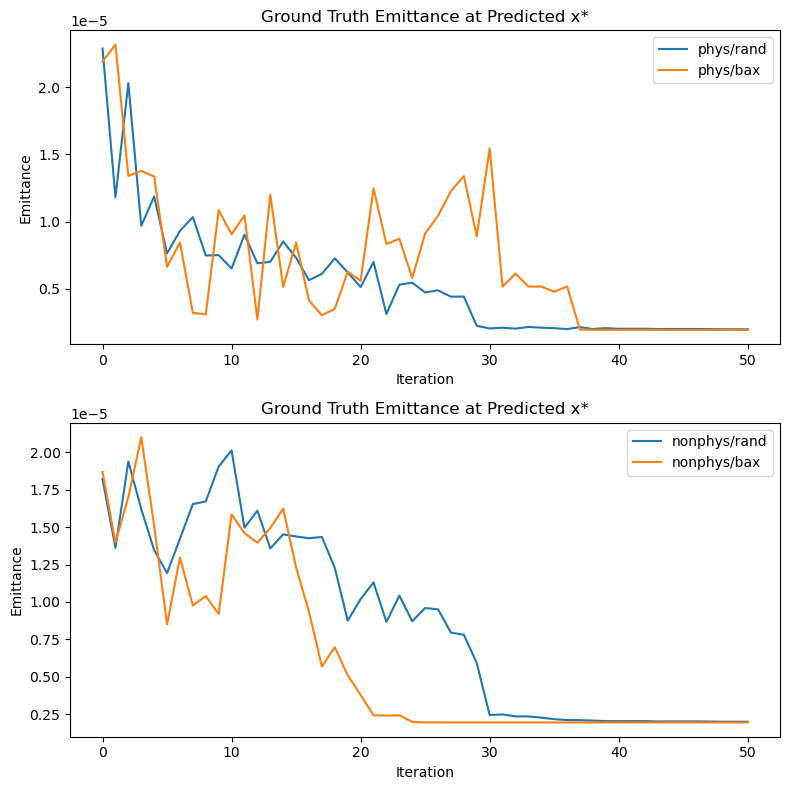

In [6]:
fig, axes = plt.subplots(2)
fig.set_size_inches((8, 8))

ax = axes[0]
ax.plot(torch.mean(gt_emits_at_x_star_pred_phys_rand, dim=0), label='phys/rand')
ax.plot(torch.mean(gt_emits_at_x_star_pred_phys_bax, dim=0), label='phys/bax')
ax.set_title('Ground Truth Emittance at Predicted x*')
ax.set_xlabel('Iteration')
ax.set_ylabel('Emittance')
ax.legend()


ax = axes[1]
ax.plot(torch.mean(gt_emits_at_x_star_pred_nonphys_rand, dim=0), label='nonphys/rand')
ax.plot(torch.mean(gt_emits_at_x_star_pred_nonphys_bax, dim=0), label='nonphys/bax')
ax.set_title('Ground Truth Emittance at Predicted x*')
ax.set_xlabel('Iteration')
ax.set_ylabel('Emittance')
ax.legend()

plt.tight_layout()

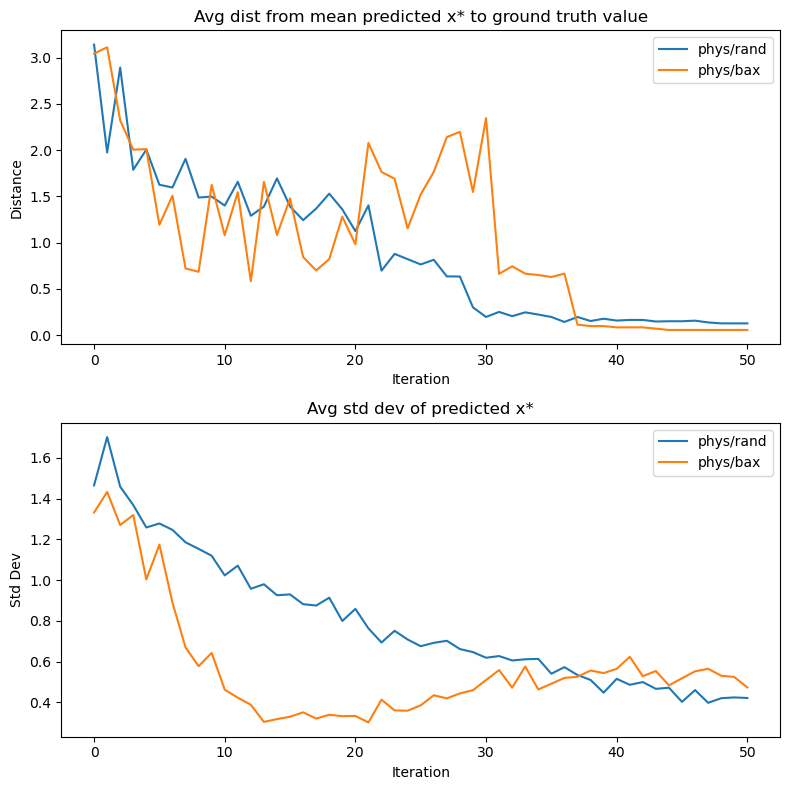

In [7]:
fig, axes = plt.subplots(2)
fig.set_size_inches((8, 8))

ax = axes[0]
ax.plot(torch.mean(dists_phys_rand, dim=0), label='phys/rand')
ax.plot(torch.mean(dists_phys_bax, dim=0), label='phys/bax')
ax.set_title('Avg dist from mean predicted x* to ground truth value')
ax.set_xlabel('Iteration')
ax.set_ylabel('Distance')
ax.legend()

ax = axes[1]
ax.plot(torch.mean(stds_phys_rand, dim=0), label='phys/rand')
ax.plot(torch.mean(stds_phys_bax, dim=0), label='phys/bax')
ax.set_title('Avg std dev of predicted x*')
ax.set_xlabel('Iteration')
ax.set_ylabel('Std Dev')
ax.legend()

plt.tight_layout()


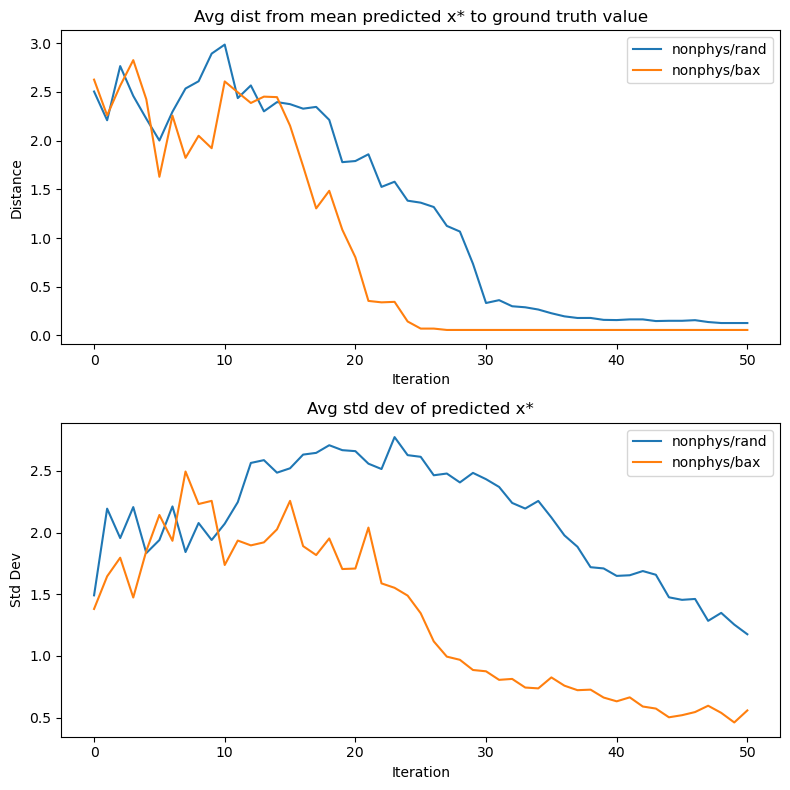

In [8]:
fig, axes = plt.subplots(2)
fig.set_size_inches((8, 8))

ax = axes[0]
ax.plot(torch.mean(dists_nonphys_rand, dim=0), label='nonphys/rand')
ax.plot(torch.mean(dists_nonphys_bax, dim=0), label='nonphys/bax')
ax.set_title('Avg dist from mean predicted x* to ground truth value')
ax.set_xlabel('Iteration')
ax.set_ylabel('Distance')
ax.legend()

ax = axes[1]
ax.plot(torch.mean(stds_nonphys_rand, dim=0), label='nonphys/rand')
ax.plot(torch.mean(stds_nonphys_bax, dim=0), label='nonphys/bax')
ax.set_title('Avg std dev of predicted x*')
ax.set_xlabel('Iteration')
ax.set_ylabel('Std Dev')
ax.legend()

plt.tight_layout()


Trial 2 

Iteration 5:
Results after 10 observations
Highest frequency =  5.0


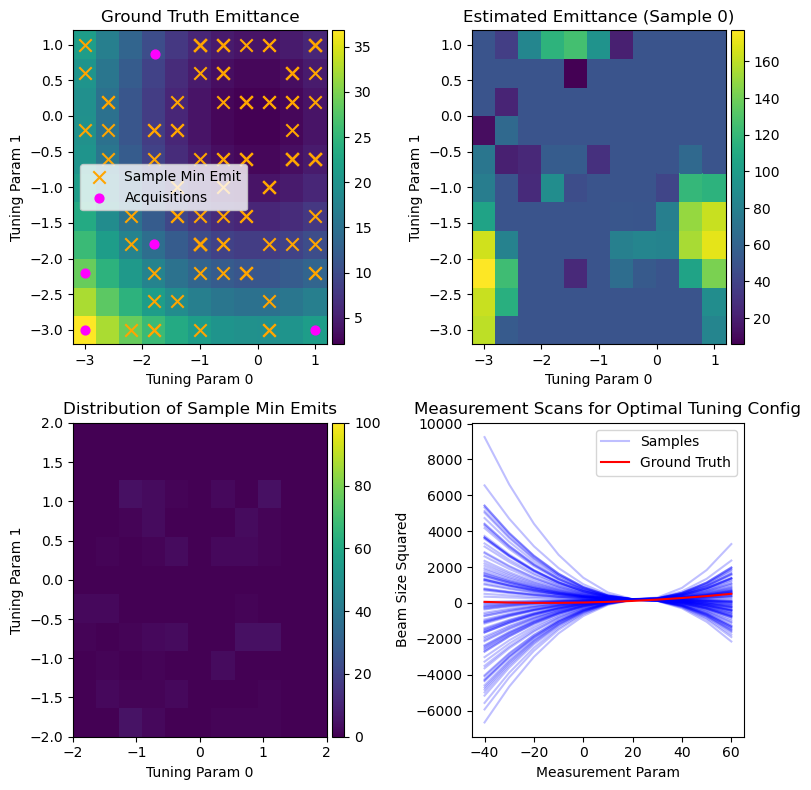

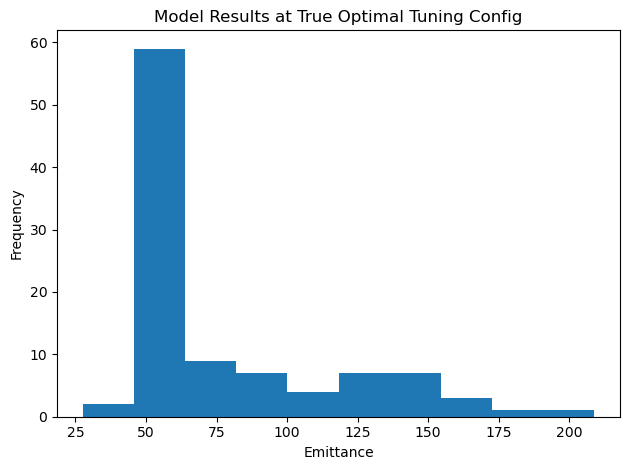

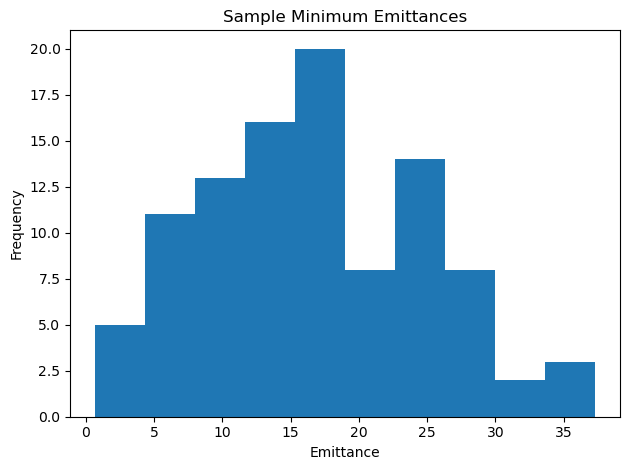

Iteration 10:
Results after 15 observations
Highest frequency =  7.0


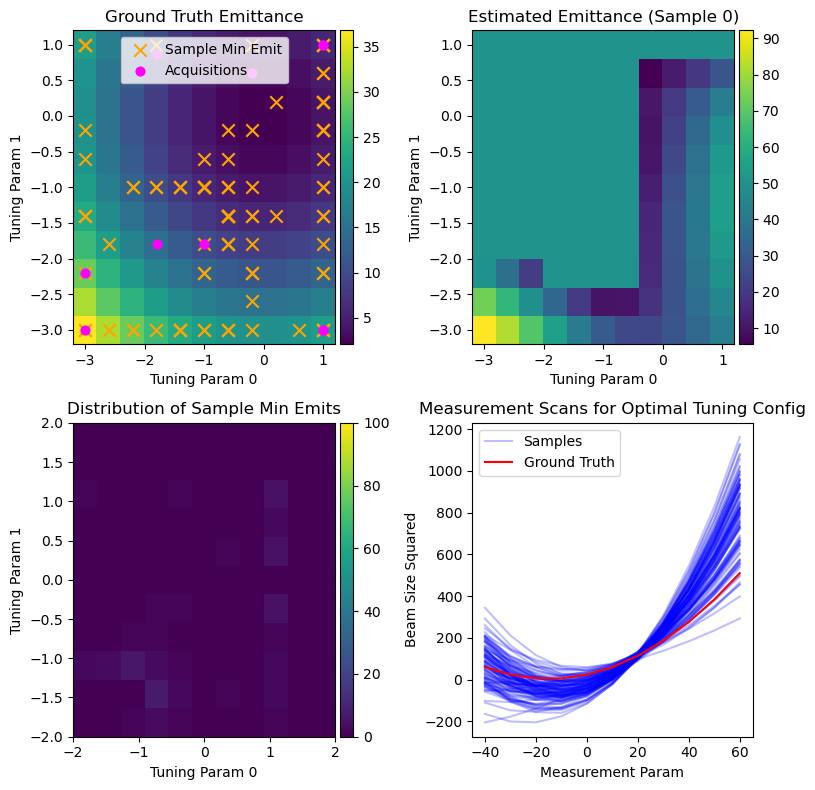

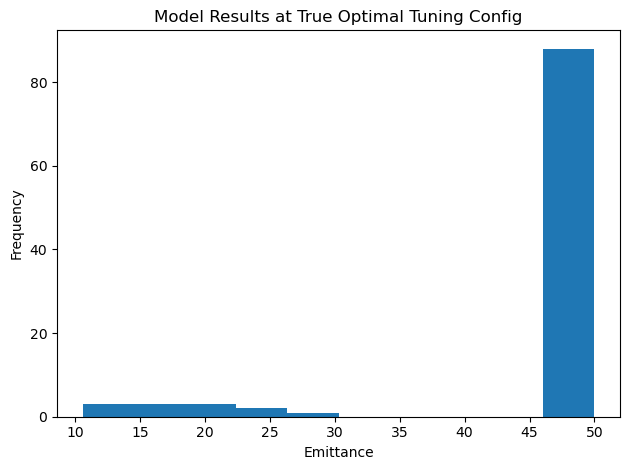

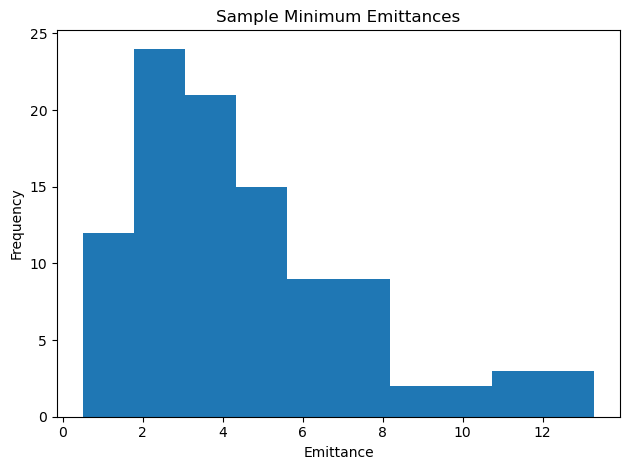

Iteration 15:
Results after 20 observations
Highest frequency =  7.0


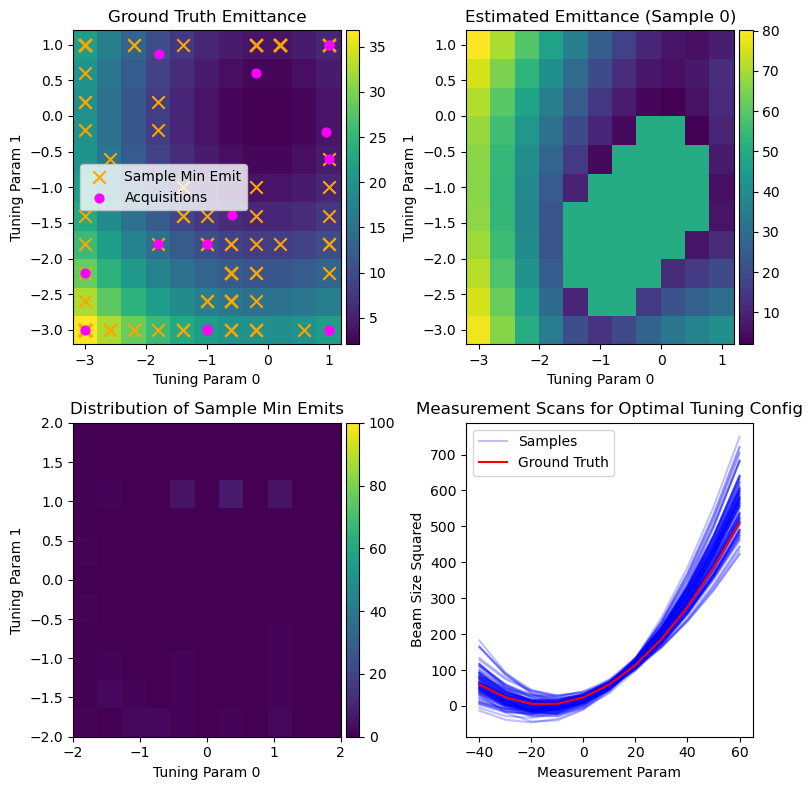

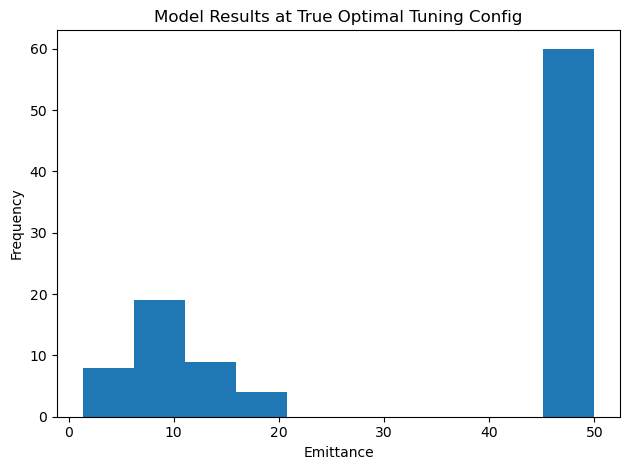

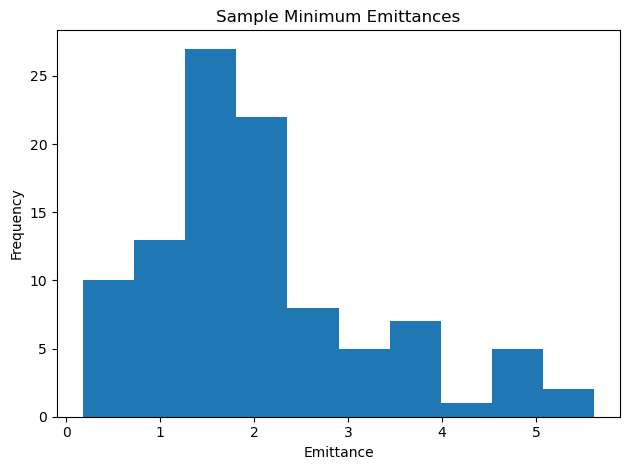

Iteration 20:
Results after 25 observations
Highest frequency =  14.0


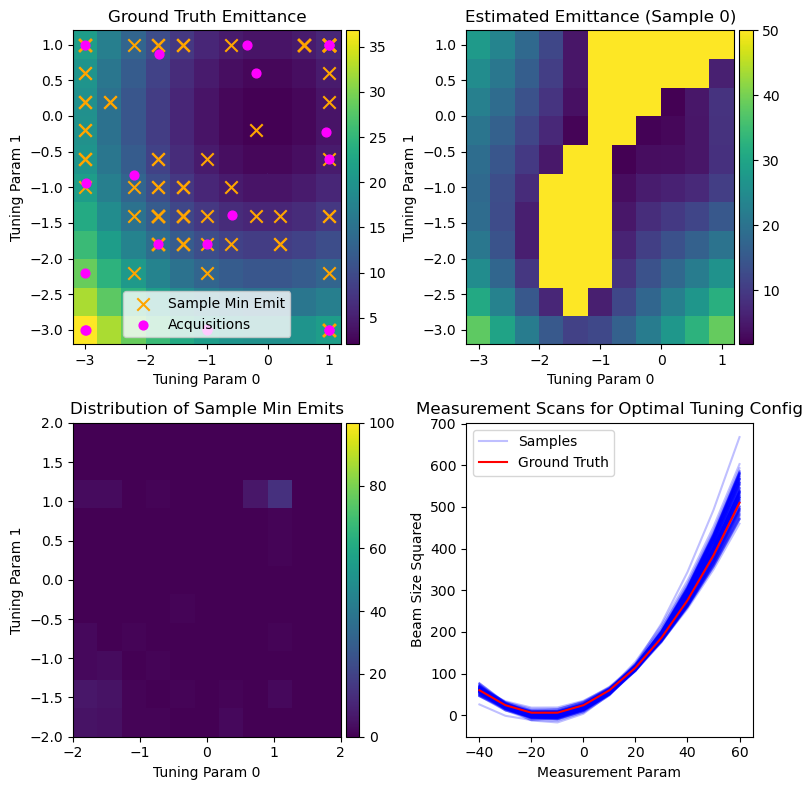

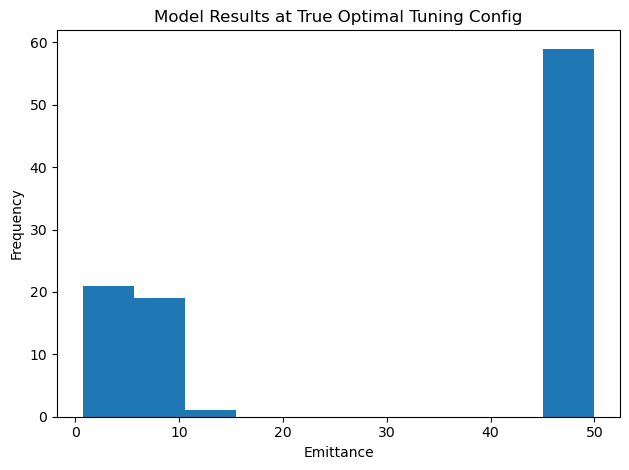

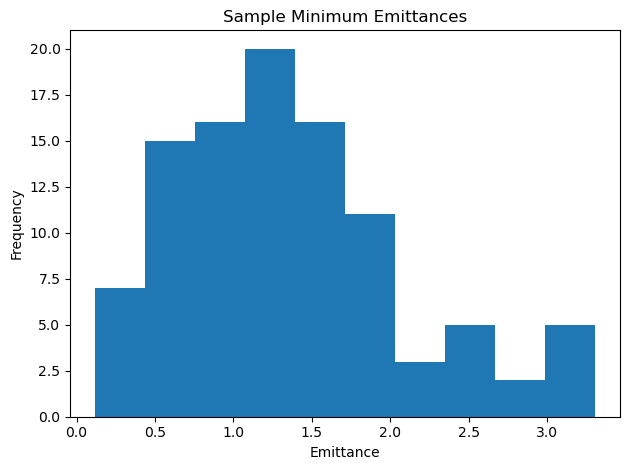

Iteration 25:
Results after 30 observations
Highest frequency =  12.0


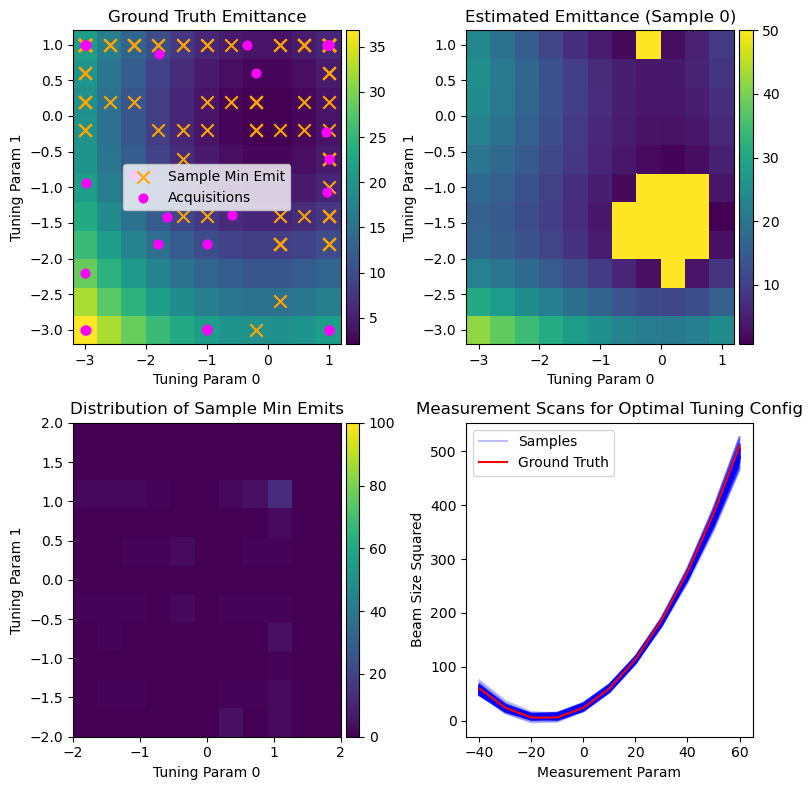

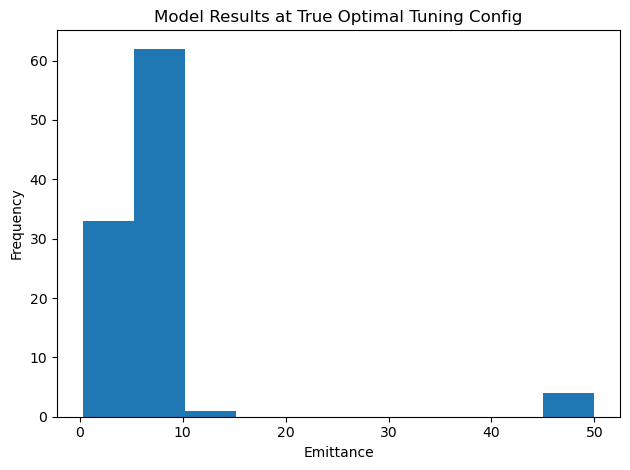

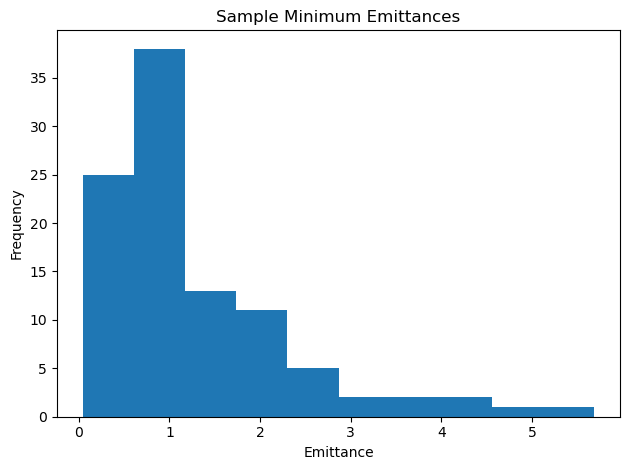

Iteration 30:
Results after 35 observations
Highest frequency =  8.0


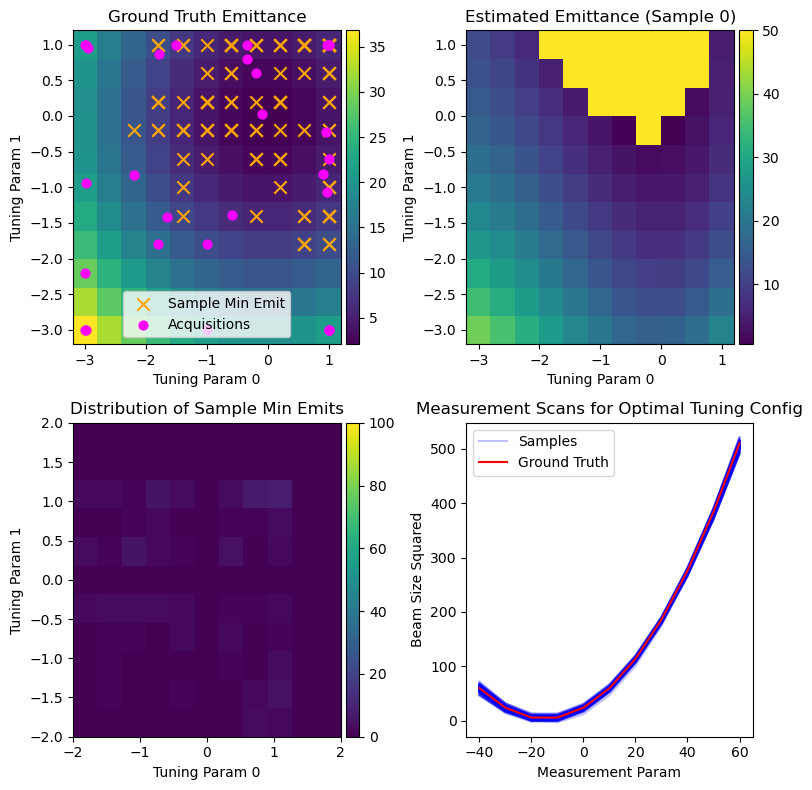

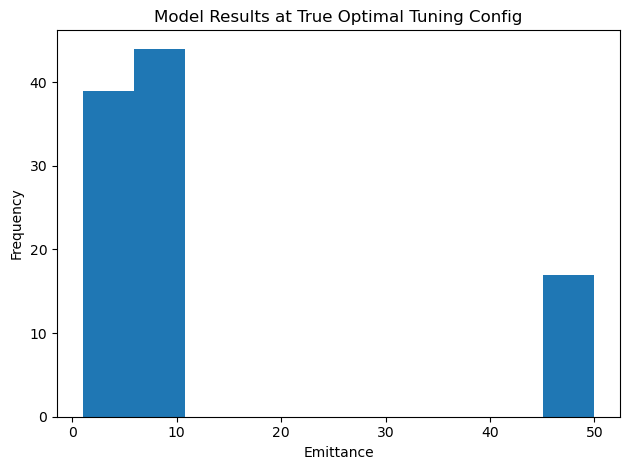

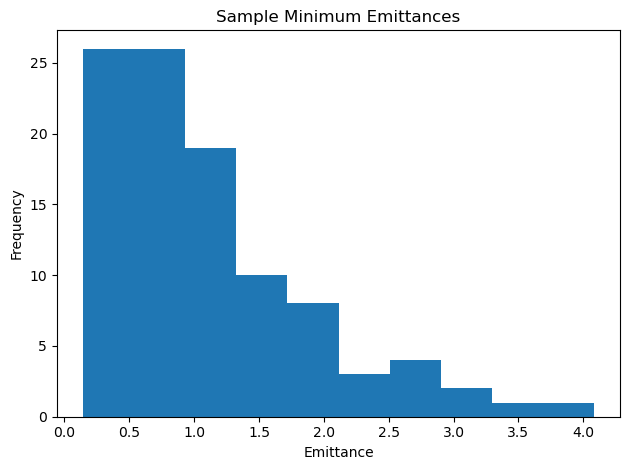

Iteration 35:
Results after 40 observations
Highest frequency =  11.0


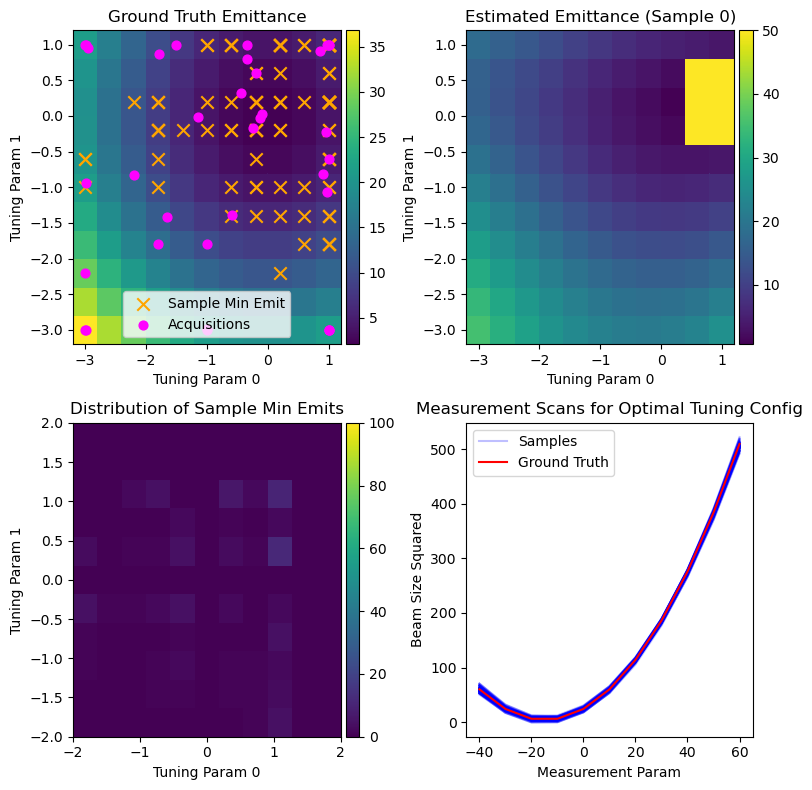

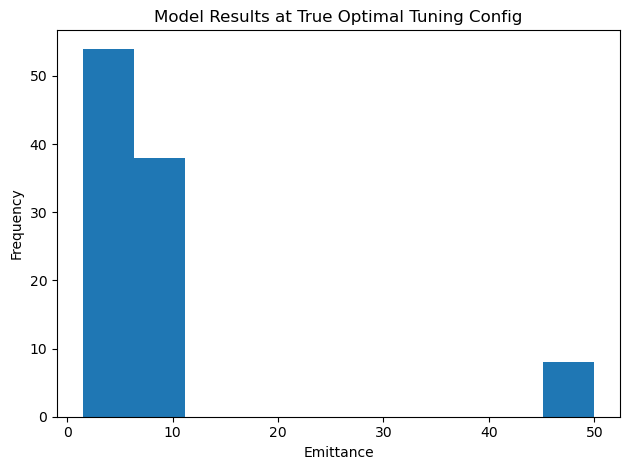

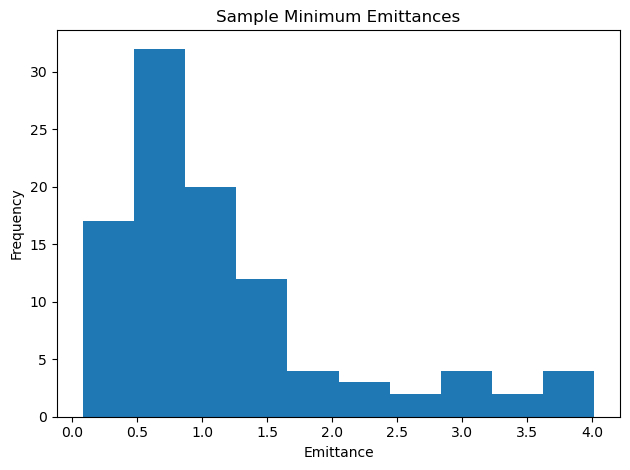

Iteration 40:
Results after 45 observations
Highest frequency =  8.0


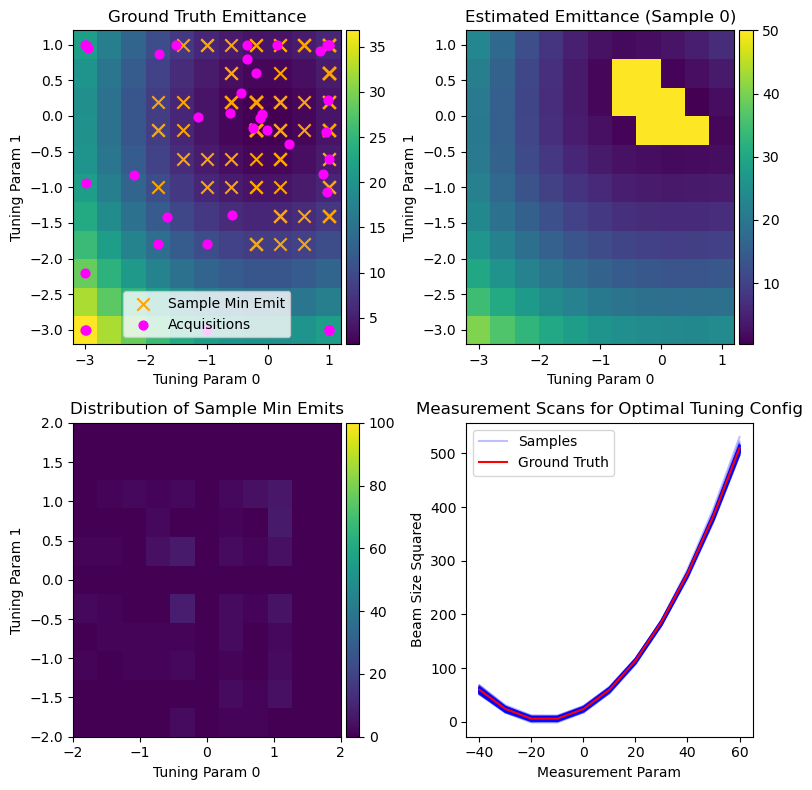

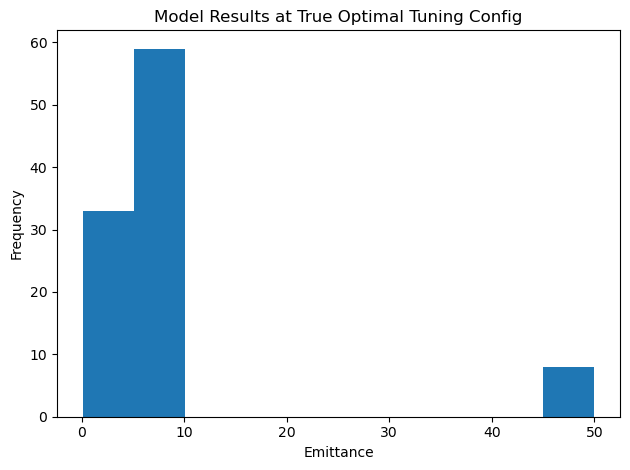

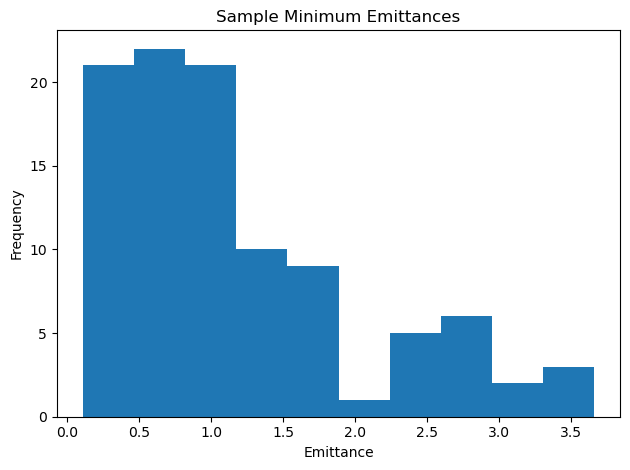

Iteration 45:
Results after 50 observations
Highest frequency =  12.0


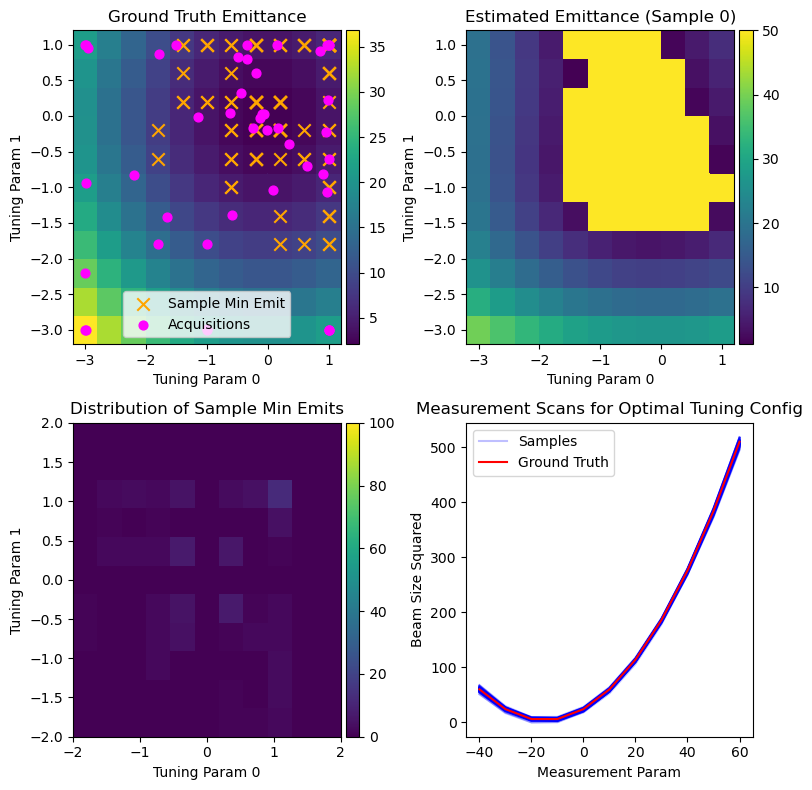

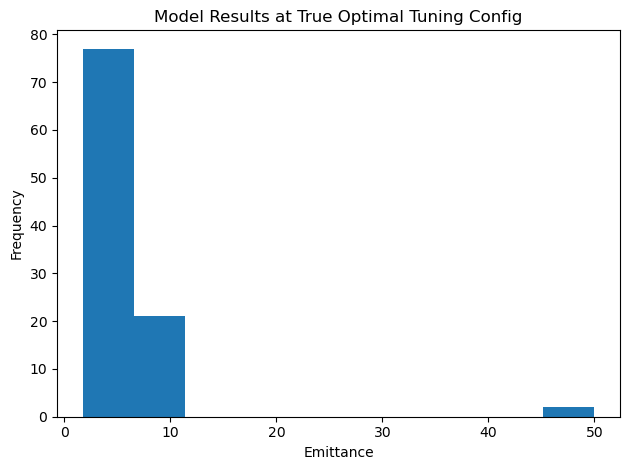

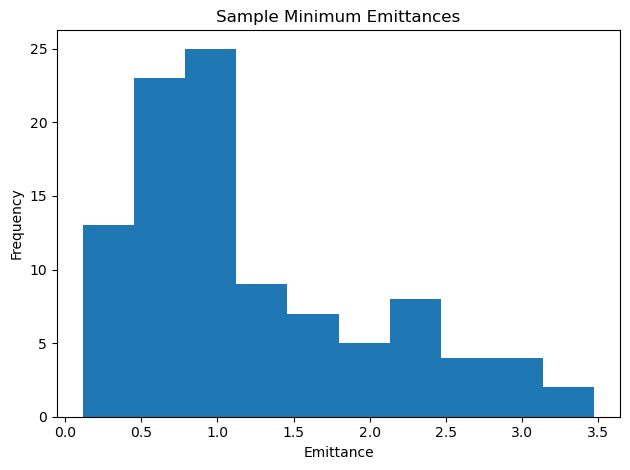

Iteration 50:
Results after 55 observations
Highest frequency =  10.0


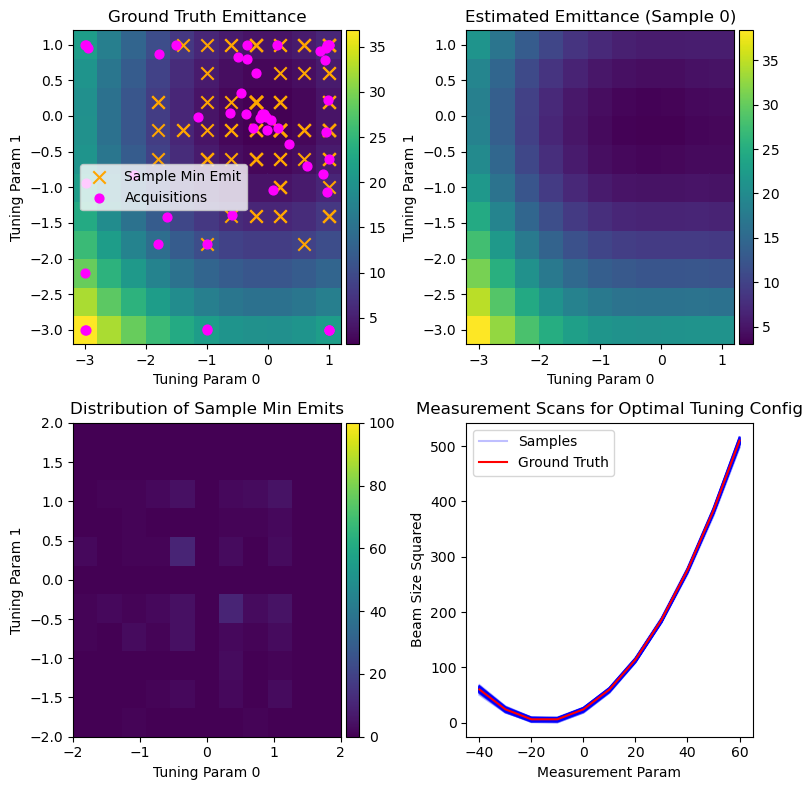

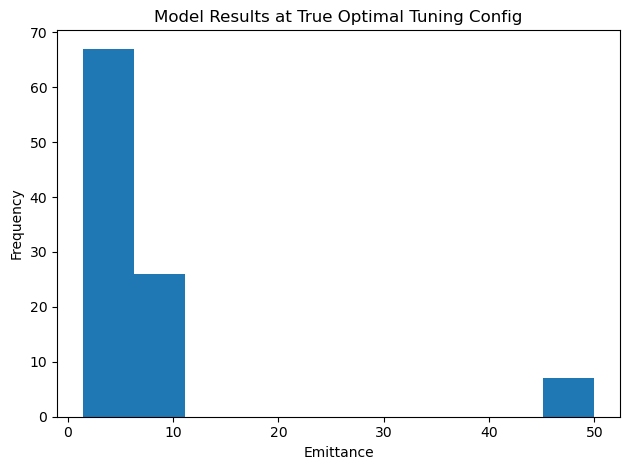

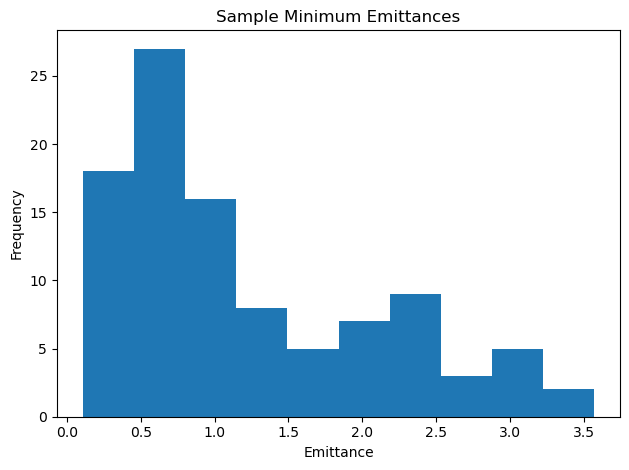

In [4]:
trial_data = trial_data_nonphys_bax
iter_plot3d(trial_data, 2,[5,10,15,20,25,30,35,40,45,50])

In [ ]:
# import dill
# with open('MC-Emittance-Random-2d-Results.pkl', 'wb') as f:
#     dill.dump(trial_data, f)